In [1]:
import os
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16
})

#### Combine files

In [5]:
def combine_parts(methods=['RHFM', 'ZM', 'PZM'], parts='parts'):
    for method in methods:
        files = list(filter(lambda file: file.startswith(method) and os.path.isfile(parts+'/'+file), os.listdir(parts)))
        files = list(map(lambda file: parts+'/'+file, files))
        combined = pd.concat([pd.read_csv(f) for f in files ])
        combined.to_csv(method+'.csv', index=False)

In [6]:
combine_parts(parts='parts128')

#### Prepare

In [7]:
rhfm = pd.read_csv('RHFM.csv')
zm = pd.read_csv('ZM.csv')
pzm = pd.read_csv('PZM.csv')

In [8]:
def extraxt(cols, extraxt_x=lambda name:float(name.split('/')[-1]), defx=1.0,):
    global rhfm, zm, pzm
    xs = []
    ys_rhfm = []
    ys_zm = []
    ys_pzm = []
    for col in cols:
        if col is None:
            xs.append(defx)
            ys_rhfm.append(0)
            ys_zm.append(0)
            ys_pzm.append(0)
            continue
        xs.append(extraxt_x(col))
        ys_rhfm.append(rhfm[col].mean())
        ys_zm.append(zm[col].mean())
        ys_pzm.append(pzm[col].mean())
    return (xs, ys_rhfm, ys_zm, ys_pzm)

In [25]:
def get_lines(ys_rhfm, ys_zm, ys_pzm):
    lines = []
    for (a,b,c) in zip(ys_rhfm, ys_zm, ys_pzm):
        aa = a = round(1-a,4)
        bb = b = round(1-b,4)
        cc = c = round(1-c,4)
        if a <= b and a <= c: aa = '\\textbf{'+str(a)+'}'
        if b <= a and b <= c: bb = '\\textbf{'+str(b)+'}'
        if c <= a and c <= b: cc = '\\textbf{'+str(c)+'}'
        lines.append(' '.join(map(str,[aa, '&', bb, '&', cc])))
    return lines

In [26]:
def make_table(groups):
    lines_arr = []
    for (prefix,scale) in groups:
        cols = list(filter(lambda name:name.startswith(prefix),rhfm.columns))
        ex = extraxt(cols)
        lines_arr.append(get_lines(*ex[1:]))
    for lines in zip(ex[0], *lines_arr):
        print('  &  '.join([str(scale(lines[0])), *lines[1:]]) + '  \\\\')

In [27]:
def plot_field(plt, ax, field, xlabel, ylabel, ylim, pad=[], padlen=3):
    global xs, ys_rhfm, ys_zm, ys_pzm
    ax.set_title(field)
    ax.plot(xs, 1-np.array(ys_rhfm), 'k:s', label='RHFM')
    ax.plot(xs, 1-np.array(ys_zm), 'k:x', label='ZM')
    ax.plot(xs, 1-np.array(ys_pzm), 'k:o', label='PZM')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(xs)
    for p in pad:
        xs[p] = '-'*padlen + '  ' + str(xs[p])
    ax.set_xticklabels(xs)
    ax.set_ylim(ylim)
    plt.setp(ax.get_xticklabels(), rotation=270)
    ax.legend()

#### Resize & Rotate

In [33]:
scale = lambda x: '$'+str(x)+'$'
make_table([
    ('Resize/Linear/', scale),
    ('Rotate/Linear/', scale),
])

$0.0$  &  \textbf{0.4156} & 0.4581 & 0.4786  &  0.0081 & \textbf{0.0072} & 0.0083  \\
$1.0$  &  \textbf{0.2312} & 0.3591 & 0.3612  &  0.0091 & \textbf{0.0072} & 0.0083  \\
$2.0$  &  \textbf{0.0923} & 0.2242 & 0.2089  &  0.0138 & \textbf{0.0072} & 0.0084  \\
$3.0$  &  \textbf{0.0336} & 0.1309 & 0.1084  &  \textbf{0.008} & 0.0083 & 0.0086  \\
$4.0$  &  \textbf{0.0114} & 0.0867 & 0.072  &  \textbf{0.0081} & 0.0088 & 0.0088  \\
$5.0$  &  \textbf{0.0088} & 0.0622 & 0.043  &  0.012 & 0.0092 & \textbf{0.0086}  \\
$10.0$  &  \textbf{0.0081} & 0.0302 & 0.0205  &  \textbf{0.0081} & 0.0122 & 0.0086  \\
$15.0$  &  \textbf{0.008} & 0.0258 & 0.0142  &  \textbf{0.0102} & 0.0144 & \textbf{0.0102}  \\
$20.0$  &  0.0081 & \textbf{0.0072} & 0.0083  &  \textbf{0.0091} & 0.0202 & 0.0125  \\
$25.0$  &  \textbf{0.0086} & 0.0205 & 0.012  &  \textbf{0.0088} & 0.0181 & 0.0095  \\
$30.0$  &  \textbf{0.008} & 0.0117 & 0.0083  &  0.0134 & 0.0175 & \textbf{0.01}  \\
$35.0$  &  \textbf{0.0081} & 0.013 & 0.0106  &  \

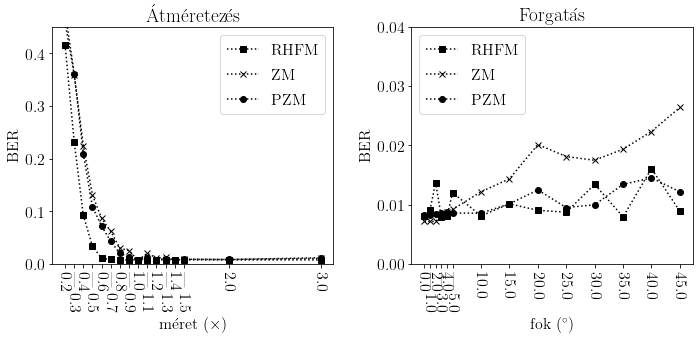

In [38]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Resize/Linear/'),rhfm.columns)))
plot_field(plt, axes[0], 'Átméretezés', 'méret ($\\times$)', 'BER', (0,0.45), pad=[1,3,5,7,9,11,13], padlen=3)
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Rotate/Linear/'),rhfm.columns)))
plot_field(plt, axes[1], 'Forgatás', 'fok ($^{\circ}$)', 'BER', (0,0.04), pad=[1,3,5], padlen=3)

plt.tight_layout()
plt.savefig('bs_resize_rotate.png', dpi=300)
plt.show()

#### Blur & Sharpen

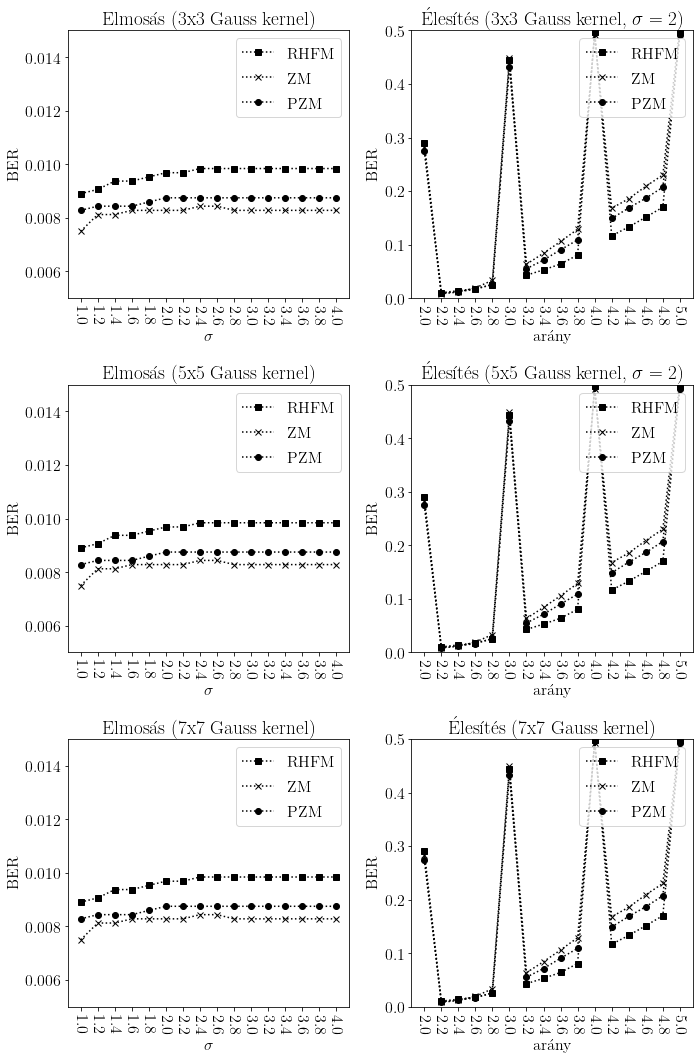

In [57]:
fig, axes = plt.subplots(3,2, figsize=(10,15))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Blur/3x3/'),rhfm.columns)))
plot_field(plt, axes[0,0], 'Elmosás (3x3 Gauss kernel)', '$\sigma$', 'BER', (0.005,0.015))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Blur/5x5/'),rhfm.columns)))
plot_field(plt, axes[1,0], 'Elmosás (5x5 Gauss kernel)', '$\sigma$', 'BER', (0.005,0.015))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Blur/7x7/'),rhfm.columns)))
plot_field(plt, axes[2,0], 'Elmosás (7x7 Gauss kernel)', '$\sigma$', 'BER', (0.005,0.015))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Sharpen/3x3/'),rhfm.columns)))
plot_field(plt, axes[0,1], 'Élesítés (3x3 Gauss kernel, $\sigma=2$)', 'arány', 'BER', (0,0.5))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Sharpen/5x5/'),rhfm.columns)))
plot_field(plt, axes[1,1], 'Élesítés (5x5 Gauss kernel, $\sigma=2$)', 'arány', 'BER', (0,0.5))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Sharpen/7x7/'),rhfm.columns)))
plot_field(plt, axes[2,1], 'Élesítés (7x7 Gauss kernel)', 'arány', 'BER', (0,0.5))

plt.tight_layout()
plt.savefig('bs_blur_sharpen.png', dpi=300)
plt.show()

#### Median

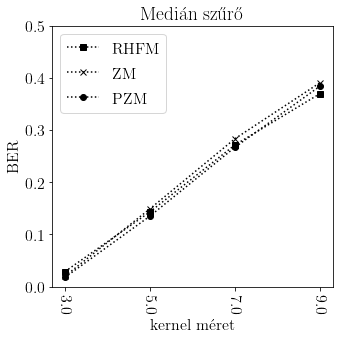

In [48]:
fig, axes = plt.subplots(1,1, figsize=(5,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Median/'),rhfm.columns)))
plot_field(plt, axes, 'Medián szűrő', 'kernel méret', 'BER', (0,0.5))

plt.tight_layout()
plt.savefig('bs_median.png', dpi=300)
plt.show()

#### Contrast & Brightness

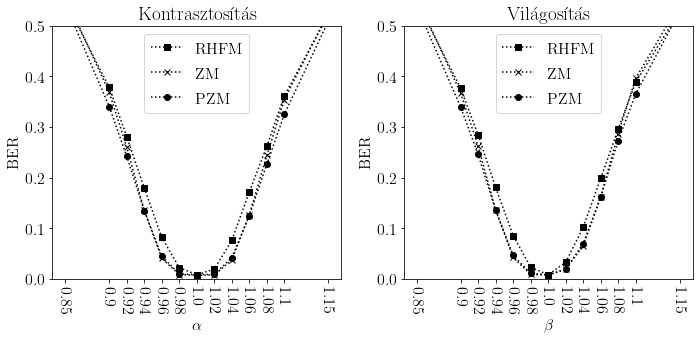

In [50]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Contrast/'),rhfm.columns)))
plot_field(plt, axes[0], 'Kontrasztosítás', '$\\alpha$', 'BER', (0,0.5))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Brightness/'),rhfm.columns)))
plot_field(plt, axes[1], 'Világosítás', '$\\beta$', 'BER', (0,0.5))

plt.tight_layout()
plt.savefig('bs_enhance.png', dpi=300)
plt.show()

#### SaltPepper & WhiteNoise

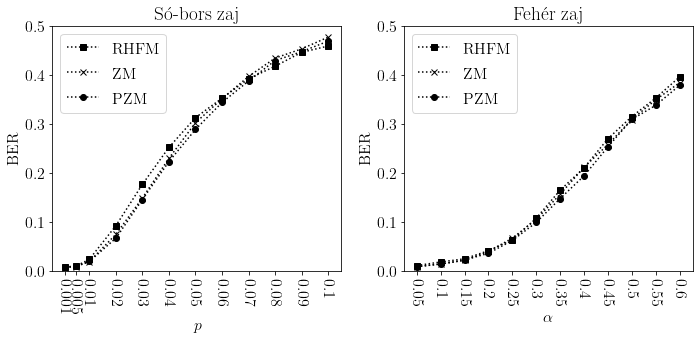

In [51]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('SaltPepper'),rhfm.columns)))
plot_field(plt, axes[0], 'Só-bors zaj', '$p$', 'BER', (0,0.5))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('WhiteNoise'),rhfm.columns)))
plot_field(plt, axes[1], 'Fehér zaj', '$\\alpha$', 'BER', (0,0.5))

plt.tight_layout()
plt.savefig('bs_noises.png', dpi=300)
plt.show()

#### JPEG & WebP

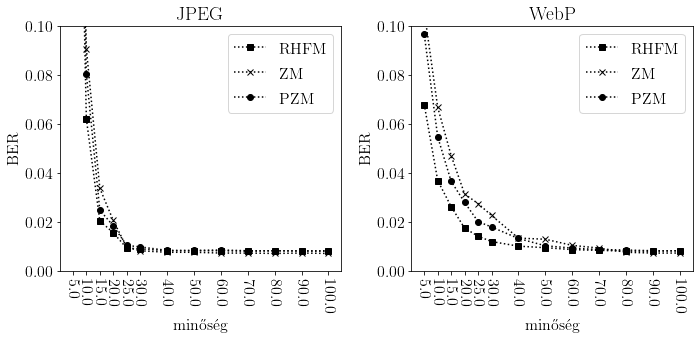

In [59]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('JPEG/'),rhfm.columns)))
plot_field(plt, axes[0], 'JPEG', 'minőség', 'BER', (0,0.1))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('WebP/'),rhfm.columns)))
plot_field(plt, axes[1], 'WebP', 'minőség', 'BER', (0,0.1))

plt.tight_layout()
plt.savefig('bs_compression.png', dpi=300)
plt.show()